In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/ue21cs342aa2/sample_submission.csv
/kaggle/input/ue21cs342aa2/train.csv
/kaggle/input/ue21cs342aa2/test.csv


In [2]:

train = pd.read_csv('/kaggle/input/ue21cs342aa2/train.csv')
test = pd.read_csv('/kaggle/input/ue21cs342aa2/test.csv')

               id        Open       Close        Volume
count  300.000000  300.000000  300.000000  3.000000e+02
mean   149.500000   75.977813   79.430489  1.866300e+08
std     86.746758   16.158343   13.878395  7.952792e+07
min      0.000000   40.269435   47.979353  5.991330e+07
25%     74.750000   64.872395   69.689227  1.324862e+08
50%    149.500000   79.805683   82.991900  1.715536e+08
75%    224.250000   88.342927   89.719145  2.201842e+08
max    299.000000  102.558322  103.119373  6.935702e+08
id          0
Date        0
Open        0
Close       0
Volume      0
Strategy    0
dtype: int64


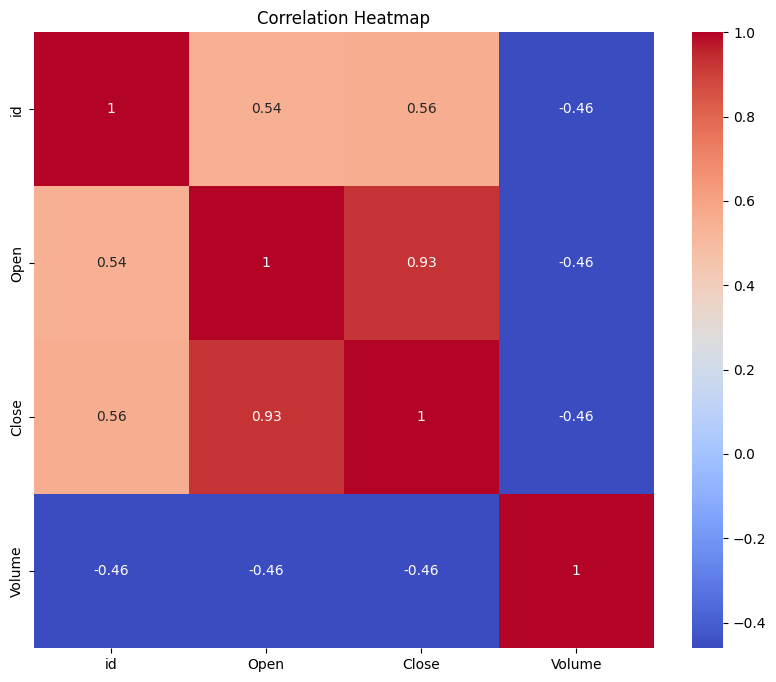

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


print(train.describe())

print(train.isnull().sum())

numeric_columns = train.select_dtypes(include=[np.number])

corr_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()








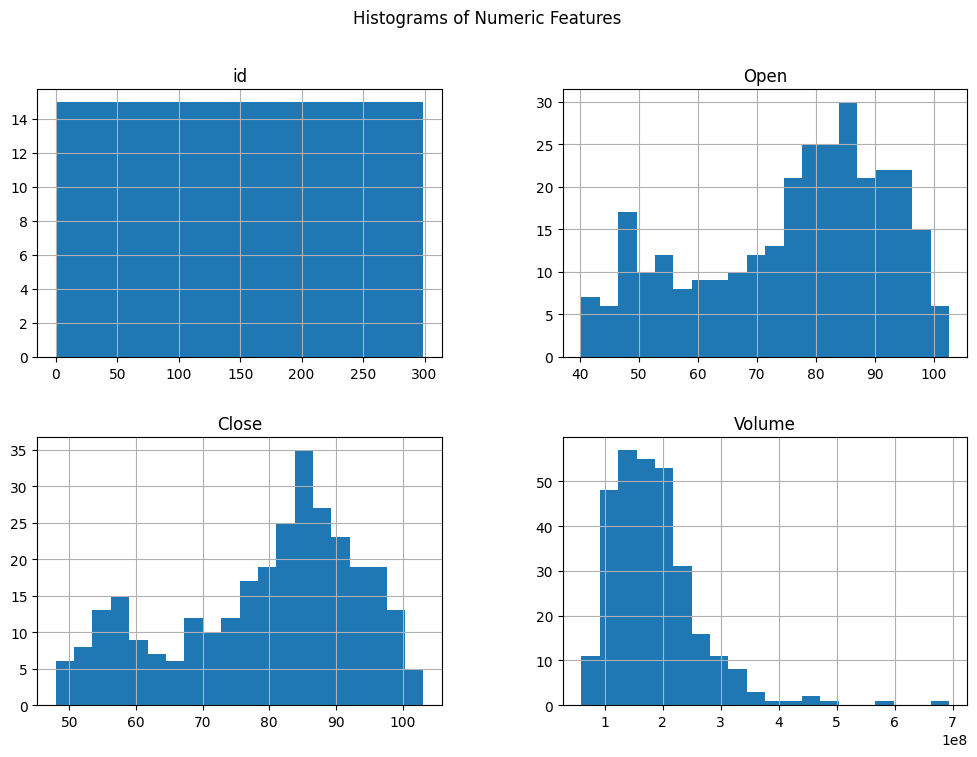

In [4]:

train.hist(bins=20, figsize=(12, 8))
plt.suptitle("Histograms of Numeric Features")
plt.show()


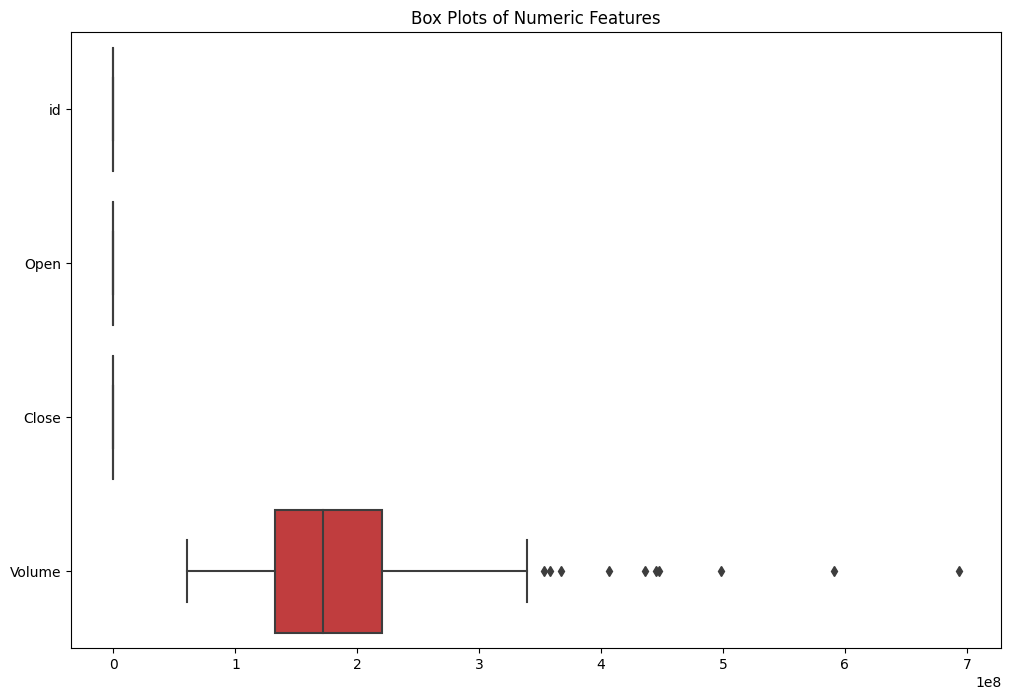

In [5]:

plt.figure(figsize=(12, 8))
sns.boxplot(data=train, orient='h')
plt.title("Box Plots of Numeric Features")
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


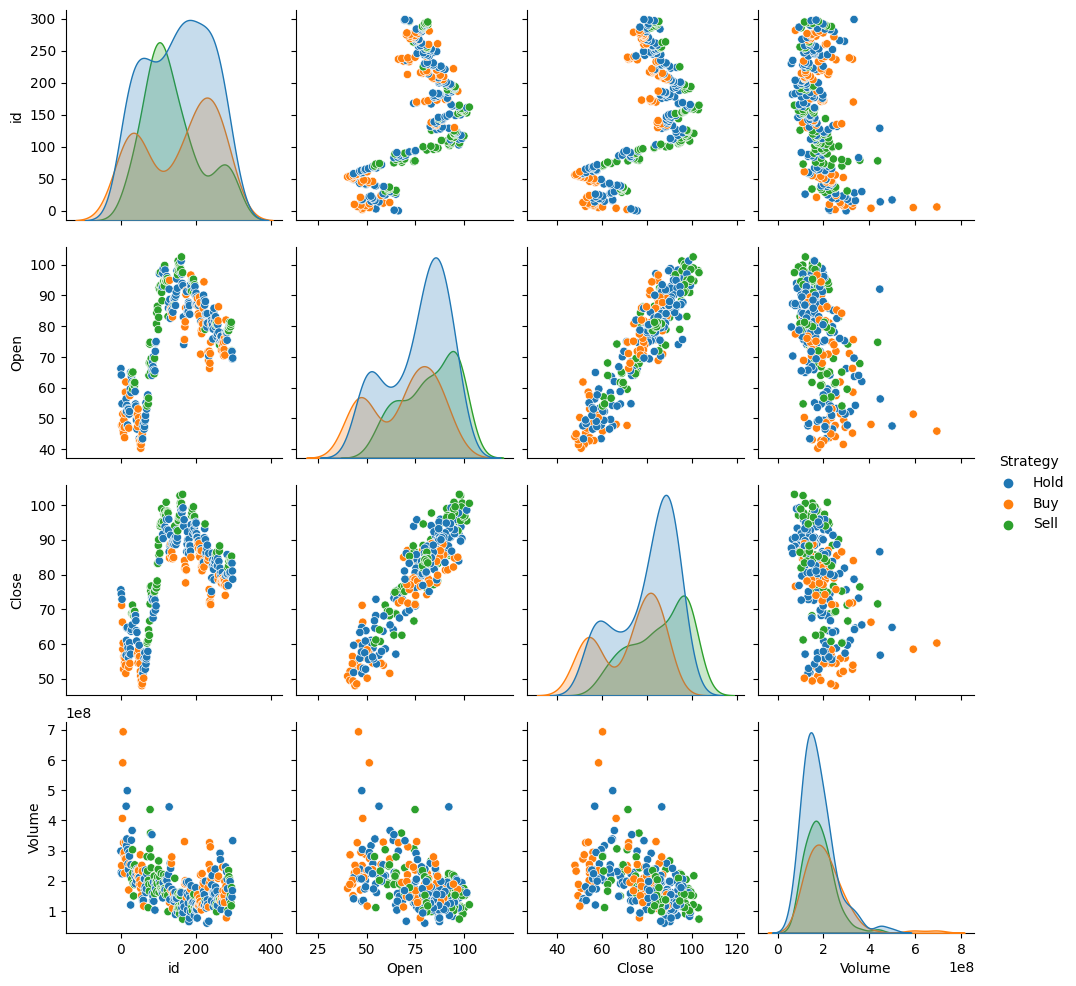

In [6]:
sns.pairplot(train, hue='Strategy', diag_kind='kde')


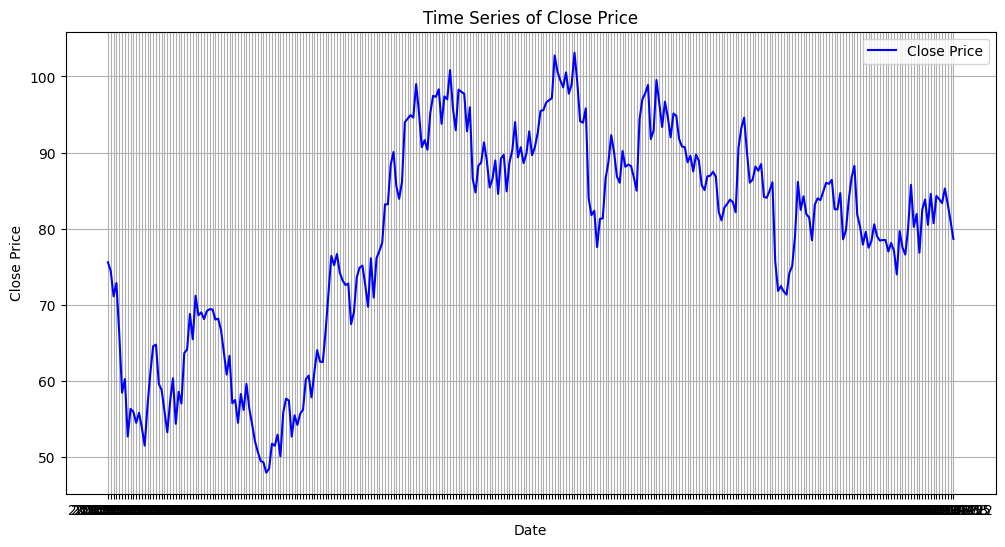

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(train['Date'], train['Close'], label='Close Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Time Series of Close Price')
plt.legend()
plt.grid(True)
plt.show()


In [8]:
train['Price_Difference'] = train['Close'] - train['Open']
train['Open_Close_Ratio'] = train['Open'] / train['Close']
train['Volume_Std'] = train['Volume'].rolling(window=10).std()
train['Day_of_Week'] = pd.to_datetime(train['Date']).dt.dayofweek
train['Month'] = pd.to_datetime(train['Date']).dt.month

test['Price_Difference'] = test['Open'] - test['Open']
test['Open_Close_Ratio'] = test['Open'] / test['Open']
test['Volume_Std'] = test['Volume'].rolling(window=10).std()
test['Day_of_Week'] = pd.to_datetime(test['Date']).dt.dayofweek
test['Month'] = pd.to_datetime(test['Date']).dt.month

print(train)
print(test)


      id        Date       Open      Close     Volume Strategy  \
0      0  2015-06-01  66.208486  75.609978  298506300     Hold   
1      1  2015-06-08  64.116235  74.443331  227974800     Hold   
2      2  2015-06-15  47.701942  71.140831  250670900      Buy   
3      3  2015-06-22  54.754816  72.881344  223614300     Hold   
4      4  2015-06-29  48.031899  66.284718  406814900      Buy   
..   ...         ...        ...        ...        ...      ...   
295  295  2021-01-25  81.284821  83.373498  117281600     Sell   
296  296  2021-02-01  71.970249  85.294903  177655800     Sell   
297  297  2021-02-08  71.784627  83.266453  146003500     Hold   
298  298  2021-02-15  69.372333  81.026827  167762500     Hold   
299  299  2021-02-22  69.618620  78.672007  332979200     Hold   

     Price_Difference  Open_Close_Ratio    Volume_Std  Day_of_Week  Month  
0            9.401492          0.875658           NaN            0      6  
1           10.327096          0.861276           NaN  

In [9]:
print(train.columns)


Index(['id', 'Date', 'Open', 'Close', 'Volume', 'Strategy', 'Price_Difference',
       'Open_Close_Ratio', 'Volume_Std', 'Day_of_Week', 'Month'],
      dtype='object')


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV
from prophet import Prophet

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END ma

09:23:37 - cmdstanpy - INFO - Chain [1] start processing
09:23:37 - cmdstanpy - INFO - Chain [1] done processing


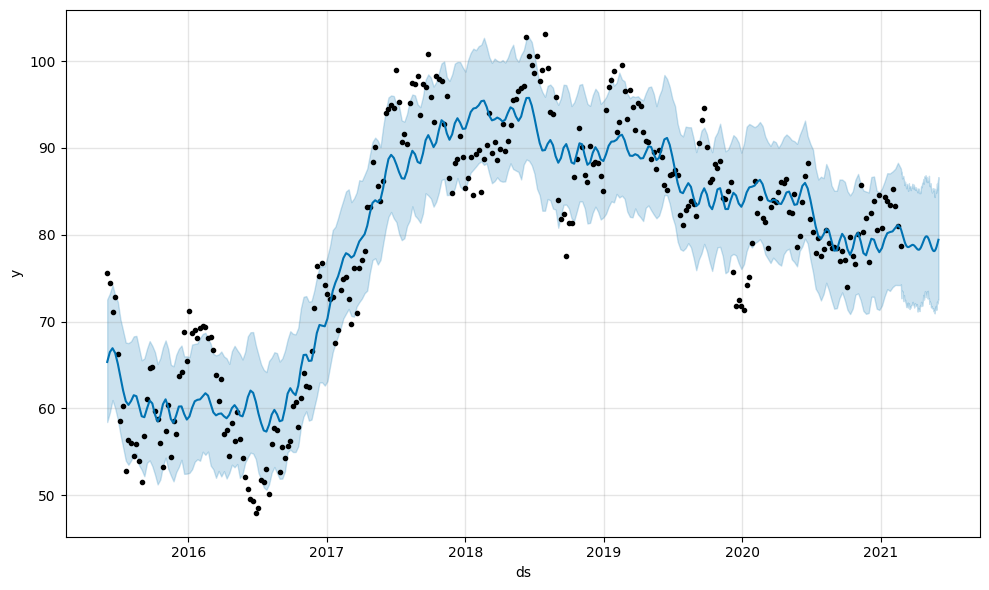

In [11]:
imputer = KNNImputer(n_neighbors=5)
X_train = train[['Open', 'Volume', 'Price_Difference', 'Open_Close_Ratio', 'Volume_Std', 'Day_of_Week', 'Month']]
y_train = train['Strategy']
X_train_imputed = imputer.fit_transform(X_train)

# Transform the test data
X_test = test[['Open', 'Volume', 'Price_Difference', 'Open_Close_Ratio', 'Volume_Std', 'Day_of_Week', 'Month']]
X_test_imputed = imputer.transform(X_test)

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_classifier = RandomForestClassifier(random_state=0)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train_imputed, y_train)
best_rf_classifier = grid_search.best_estimator_

# Predict the strategies for the test data using the trained model
y_test_strategy = best_rf_classifier.predict(X_test_imputed)

# Add the predicted strategies to the "test" DataFrame
test['Strategy'] = y_test_strategy

# Time series analysis using Prophet
train_data = train[['Date', 'Open', 'Close', 'Volume', 'Price_Difference', 'Open_Close_Ratio']]
train_data = train_data.rename(columns={'Date': 'ds', 'Close': 'y'})
model = Prophet()
model.fit(train_data)

future = model.make_future_dataframe(periods=len(test))
forecast = model.predict(future)
predicted_values = forecast[-len(test):][['ds', 'yhat']]
test['Predicted_Close'] = predicted_values['yhat'].values

# Plot the forecasted values from Prophet
fig = model.plot(forecast)
plt.show()







In [12]:
test_data = test.copy()

test_data = test_data.rename(columns={"Date": "ds", "Open": "y"})

test_data['ds'] = pd.to_datetime(test_data['ds'])


In [13]:
prophet_model = Prophet()
prophet_model.fit(train_data) 

y_close_pred = prophet_model.predict(train_data)

y_close_pred_test = prophet_model.predict(test_data) 


09:23:38 - cmdstanpy - INFO - Chain [1] start processing
09:23:39 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
from sklearn.model_selection import train_test_split

X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train_imputed, y_train, test_size=0.2, random_state=0
)

best_rf_classifier.fit(X_train_split, y_train_split)

y_val_pred = best_rf_classifier.predict(X_val)

validation_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", validation_accuracy)


Validation Accuracy: 0.5833333333333334


In [15]:
submission = test[['id', 'Date', 'Predicted_Close', 'Strategy']]
submission.columns = ['id', 'Date', 'Close', 'Strategy']

submission.to_csv('submission.csv', index=False)


In [16]:
print(submission)


    id        Date      Close Strategy
0    0  2021-03-01  80.633052     Hold
1    1  2021-03-08  80.505359     Hold
2    2  2021-03-15  80.366709     Hold
3    3  2021-03-22  80.219382     Hold
4    4  2021-03-29  80.065871     Hold
..  ..         ...        ...      ...
95  95  2022-12-26  78.743447     Hold
96  96  2023-01-02  78.901050     Hold
97  97  2023-01-09  79.068080     Hold
98  98  2023-01-16  79.241421     Hold
99  99  2023-01-23  79.417858     Hold

[100 rows x 4 columns]
